In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from ISLP import load_data

In [9]:
from ISLP.models import (ModelSpec as MS, summarize, poly)

# 15(a)

In [3]:
Boston = load_data("Boston")

In [4]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [8]:
Boston["rad"].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [13]:
results = []
for i in range(1, Boston.shape[1]):
    print(Boston.columns[i])
    Xmm = MS([Boston.columns[i]]).fit_transform(Boston)
    result = sm.OLS(Boston["crim"], Xmm).fit()
    results.append(result)

zn
indus
chas
nox
rm
age
dis
rad
tax
ptratio
lstat
medv


In [14]:
for i in results:
    print(i.summary())
    print("\n\n\n\n\n")

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.51e-06
Time:                        21:38:25   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4537      0.417     10.675      0.0

1) The responses in which there is significantly statistic association between predictor and response are zn, indus, nox, rm, age, dis, rad, tax, ptratio, lstat, medv. i.e except chas.

In [22]:
def abline(ax, slope, intercept, *args, **kwargs):
    x_vals = np.array(ax.get_xlim())
    y_vals = x_vals*slope + intercept
    ax.plot(x_vals, y_vals, *args, **kwargs)

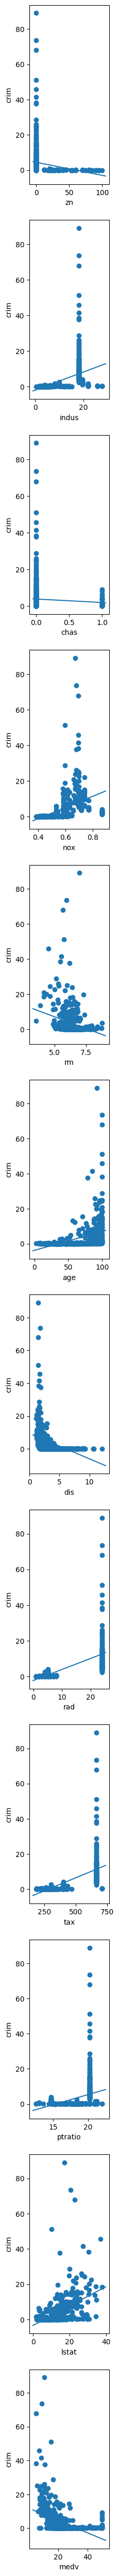

In [29]:
# Plot to defend my statement
fig, ax=plt.subplots(12, 1, figsize=(2, 64))
for i in range(12):
    ax[i].scatter(Boston[Boston.columns[i+1]], Boston["crim"])
    ax[i].set_xlabel(Boston.columns[i+1])
    ax[i].set_ylabel("crim")
    abline(ax[i], results[i].params[1], results[i].params[0])
# see relationships with crim

# 15(b)

In [30]:
X_mm_multi = MS(Boston.columns[1:]).fit_transform(Boston)
result_multi = sm.OLS(Boston["crim"], X_mm_multi).fit()
result_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.03e-56
Time:                        21:52:45   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Hence for the predictors, zn, dis, rad, medv=> we can reject null hypothesis.

# 15(c)

In [31]:
# Collecting all univariate regression coefficients
uni_coeffs = []
for i in results:
    uni_coeffs.append(i.params[1])
uni_coeffs

[-0.07393497740412368,
 0.5097763311042306,
 -1.892776550803758,
 31.248531201122923,
 -2.684051224113948,
 0.1077862271395331,
 -1.5509016824100994,
 0.6179109273272014,
 0.02974225282276537,
 1.1519827870705872,
 0.5488047820623981,
 -0.363159922257603]

In [33]:
# Collecting multivariate coefficients
multi_coeffs = result_multi.params[1:]
multi_coeffs

zn         0.045710
indus     -0.058350
chas      -0.825378
nox       -9.957587
rm         0.628911
age       -0.000848
dis       -1.012247
rad        0.612465
tax       -0.003776
ptratio   -0.304073
lstat      0.138801
medv      -0.220056
dtype: float64

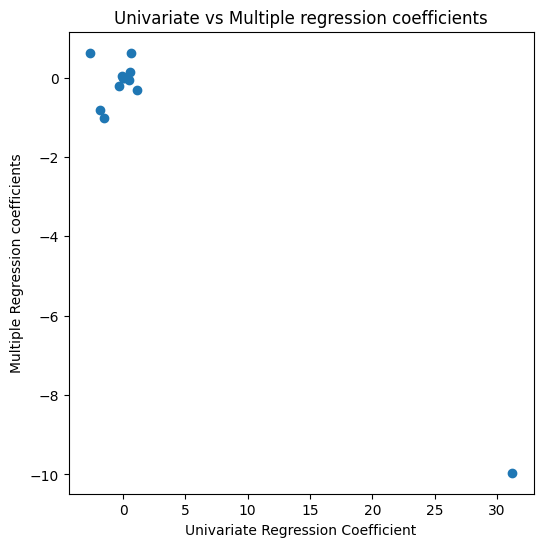

In [34]:
ax = plt.subplots(figsize=(6, 6))[1]
ax.scatter(uni_coeffs, multi_coeffs)
ax.set_xlabel("Univariate Regression Coefficient")
ax.set_ylabel("Multiple Regression coefficients")
ax.set_title("Univariate vs Multiple regression coefficients");

In [35]:
diff_in_coeffs = abs(np.array(uni_coeffs)-multi_coeffs.to_numpy())
diff_in_coeffs

array([1.19645016e-01, 5.68126442e-01, 1.06739900e+00, 4.12061177e+01,
       3.31296189e+00, 1.08634506e-01, 5.38654944e-01, 5.44561583e-03,
       3.35178993e-02, 1.45605554e+00, 4.10004185e-01, 1.43103563e-01])

# 15(d)

In [50]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [67]:
results1 = []
for i in range(1, Boston.shape[1]):
    print(Boston.columns[i])
    Xmm = MS([poly(Boston.columns[i], degree=3)]).fit_transform(Boston)
    result = sm.OLS(Boston["crim"], Xmm).fit()
    results1.append(result)

zn
indus
chas
nox
rm
age
dis
rad
tax
ptratio
lstat
medv


In [68]:
results1[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.28e-06
Time:                        22:22:22   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 3.6135      0.372      9.709      0.000       2.882       4.345
poly(zn, degree=3)[0]   -38.7498      8.372     -4.628      0.000     -55.199     -22.301
poly(zn, degree=3)[1]    23.9398      8.372      2.859      0.004       7.491      40.389
poly(zn, degree=3)[2]   -10.0719      8.372     -1.203      0.230     -26.521       6.377
==============================================================================
Omnibus:                      569.133   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33700.991
Skew:                           5.272   Prob(JB):                         0.00
Kurtosis:                      41.565   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
def abline_poly(ax, B0, B1, B2, B3, *args, **kwargs):
    x_vals = np.array(ax.get_xlim())
    y_vals = B0+(B1*x_vals)+(B2*(x_vals**2))+(B3*(x_vals**3))
    ax.plot(x_vals, y_vals, *args, **kwargs)

In [70]:
print(results1[0].params[0])
print(results1[0].params[1])
print(results1[0].params[2])
print(results1[0].params[3])
print("\n")
results1[0].params

3.613523557312254
-38.7498352143425
23.939831981966307
-10.071868127688598




intercept                 3.613524
poly(zn, degree=3)[0]   -38.749835
poly(zn, degree=3)[1]    23.939832
poly(zn, degree=3)[2]   -10.071868
dtype: float64

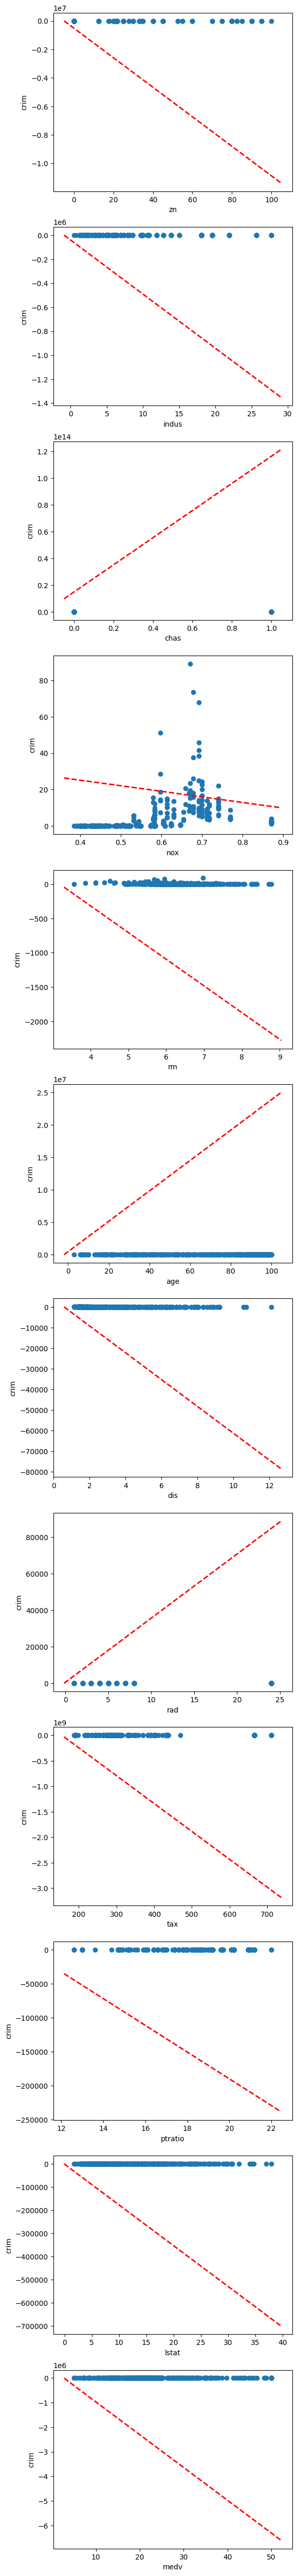

In [71]:
fig, ax=plt.subplots(12, 1, figsize=(6, 64))
for i in range(12):
    ax[i].scatter(Boston[Boston.columns[i+1]], Boston["crim"])
    ax[i].set_xlabel(Boston.columns[i+1])
    ax[i].set_ylabel("crim")
    abline_poly(ax[i], results1[i].params[0], results1[i].params[1], results1[i].params[2], results1[i].params[3], color="r", linestyle="--", linewidth=2)